<a href="https://colab.research.google.com/github/jeandrelucasdalexandre/welcome/blob/main/An%C3%A1lise_AirBnb_Chicago_Illinois_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Chicado, Illinois, USA*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, mesmo sem **possuir nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Chicado, Illinois, Estados Unidos, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [339]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/il/chicago/2021-07-10/visualisations/listings.csv")

In [37]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [38]:
df.drop(columns='neighbourhood_group', inplace=True)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

**Dicionário das variáveis**

*A variável nighbourhood_group foi removida pois todas as colunas estavam vazias.*

*Apenas 1 registro não possui a variável host_name, este registro foi mantido pois o nome do host não causa impacto na análise atual*

As variáveis abaixo estão presentes no dataset, algumas análises preliminares podem ser feitas, mas necessitam de conhecimento aprofundado da plataforma para serem confirmadas.

* id: identificação única do anúncio
* name: nome do anúncio 
* host_id: identificação única do anunciante
* host_name: primeiro nome do anunciante ou nome da empresa
* neighbourhood: bairro de localização do anúncio
* latitude e longitude: juntas representam a localização geográfica do anúncio. as variáveis 'latitude' e 'longitude' precisam estar juntas para integrar a informação. Separadas elas não significam muita coisa.
* room_type: representa o tipo do ambiente anunciado (quarto, sala, casa inteira, apartamento, entre outros...)
* price: preço do anúncio
* minimum_nights: quantidade mínima de noites que precisam ser alugadas
* number_of_reviews: quantidade de avaliações
* last_review: data da última avaliação
* reviews_per_month: quantidade de avaliações por mês
* calculates_host_listings_count: quantidade de anúncios que pertecem ao mesmo anunciante
* availability_365: identifica se o anúncio está disponível todos os dias do ano ou não.

Preliminarmente convém observar que a mesma quantidade de dados ausentes para last_review e reviews_per_month (1084 registros ausentes para ambas) somado ao fato de que esses registros possuem a variável number_of_reviews igual a 0 (zero) pode indicar uma quantidade anúncios novos (ou não tão novos, porém recentes o suficiente para nunca terem sido avaliados), na casa de 17,02%.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [338]:
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,Hyde Park - Walk to University of Chicago,2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,85,1,185,2021-06-21,2.45,1,338
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,65,2,401,2021-05-22,3.32,1,59
2,10945,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.91196,-87.63981,Entire home/apt,143,4,28,2021-06-21,0.32,10,102
3,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,Near North Side,41.90491,-87.63213,Entire home/apt,99,7,11,2021-05-09,0.14,1,242
4,12140,Lincoln Park Guest House,46734,Sharon And Robert,Lincoln Park,41.92357,-87.64947,Private room,329,2,7,2021-07-06,0.10,1,165


Quantidade de anúncios que pertencem a anunciantes com mais de 1 anúncio ativo:

In [40]:
items_from_hosts_with_more_than_one = df[df.calculated_host_listings_count > 1]
items_from_hosts_with_more_than_one.shape[0]

3794

Quantidade de anúncios que pertencem a anunciantes com apenas 1 anúncio ativo:

In [41]:
items_from_hosts_with_only_one = df[df.calculated_host_listings_count == 1]
items_from_hosts_with_only_one.shape[0]

2572

Quantidade de anúncios ativos na plataforma: 6366

In [42]:
items_from_hosts_with_more_than_one.shape[0] + items_from_hosts_with_only_one.shape[0]

6366

In [43]:
df.shape[0]

6366

Quantidade de anunciantes ativos na plataforma: 3371

In [44]:
hosts_unique = df.host_id.unique()
hosts_quantity = len(hosts_unique)
hosts_quantity

3371

In [45]:
hosts_with_more_than_one = hosts_quantity - items_from_hosts_with_only_one.shape[0]
hosts_with_more_than_one

799

In [46]:
hosts_with_more_than_one_percent = (hosts_with_more_than_one*100)/hosts_quantity
hosts_with_more_than_one_percent

23.702165529516463

In [47]:
items_from_hosts_with_more_than_one_percent = (items_from_hosts_with_more_than_one.shape[0]*100)/df.shape[0]
items_from_hosts_with_more_than_one_percent

59.597863650644044

23,7% (799) dos usuários anunciantes são responsáveis por 59,59% (3794) anúncios na plataforma, contra 40,41% (2572) anúncios de usuários que possuem apenas 1 imóvel/quarto/ambiente disponível. O que pode representar tanto a consolidação do uso da plataforma por empresas e negócios, bem como pode representar uma multiplicidade de anúncios para um mesmo imóvel (quarto1/quarto2/imóvel completo). Esta informação também pode indicar que estratégias de marketing para empresas de locação e locatários com mais de 1 imóvel/anúncio (objetivo comercial da locação) podem ser mais eficázes que estratégias voltados ao aluguel de varejo. 

***Uma análise mais aprofundada pode ser realizada caso este seja o objetivo da exploração.***

In [55]:
len(ids_from_hosts_with_more_than_one.host_id.unique())


799

In [63]:
new_items = (1084*100)/df.shape[0]
new_items

17.027961043041156

## Análise dos Dados


In [65]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,Hyde Park - Walk to University of Chicago,2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,85,1,185,2021-06-21,2.45,1,338
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,65,2,401,2021-05-22,3.32,1,59
2,10945,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.91196,-87.63981,Entire home/apt,143,4,28,2021-06-21,0.32,10,102
3,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,Near North Side,41.90491,-87.63213,Entire home/apt,99,7,11,2021-05-09,0.14,1,242
4,12140,Lincoln Park Guest House,46734,Sharon And Robert,Lincoln Park,41.92357,-87.64947,Private room,329,2,7,2021-07-06,0.10,1,165


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [98]:
# identificar o volume de dados do DataFrame
df.shape

(6366, 15)

In [337]:
# verificar as 5 primeiras entradas do dataset
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,Hyde Park - Walk to University of Chicago,2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,85,1,185,2021-06-21,2.45,1,338
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,65,2,401,2021-05-22,3.32,1,59
2,10945,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.91196,-87.63981,Entire home/apt,143,4,28,2021-06-21,0.32,10,102
3,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,Near North Side,41.90491,-87.63213,Entire home/apt,99,7,11,2021-05-09,0.14,1,242
4,12140,Lincoln Park Guest House,46734,Sharon And Robert,Lincoln Park,41.92357,-87.64947,Private room,329,2,7,2021-07-06,0.10,1,165


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [100]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isnull().sum() / df.shape[0]

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000157
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.170280
reviews_per_month                 0.170280
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

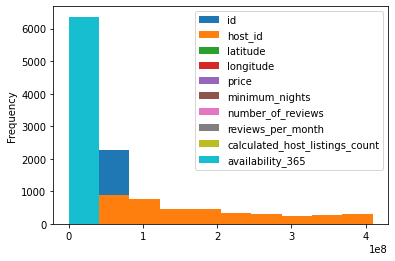

In [103]:
# plotar o histograma das variáveis numéricas
df.plot.hist();

### **Q4. Qual a média dos preços de aluguel?**

In [104]:
# ver a média da coluna `price``
df.price.mean()

183.09550738297204

### **Q4. Qual a correlação existente entre as variáveis**

In [109]:
# criar uma matriz de correlação
cor = df.corr()
# mostrar a matriz de correlação
cor

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.511443,-0.113966,0.104677,0.047472,-0.013893,-0.499892,0.090119,0.189280,0.116844
host_id,0.511443,1.000000,-0.142116,0.092386,0.032022,-0.025975,-0.231395,0.076787,-0.031579,0.085260
latitude,-0.113966,-0.142116,1.000000,-0.513209,0.036633,-0.017387,0.070251,0.039936,-0.031489,-0.075602
longitude,0.104677,0.092386,-0.513209,1.000000,0.069628,0.093104,-0.095800,-0.032201,0.189848,0.060440
price,0.047472,0.032022,0.036633,0.069628,1.000000,-0.009440,-0.071542,-0.024653,0.011101,0.059591
minimum_nights,-0.013893,-0.025975,-0.017387,0.093104,-0.009440,1.000000,-0.137630,-0.092003,0.214067,0.177503
number_of_reviews,-0.499892,-0.231395,0.070251,-0.095800,-0.071542,-0.137630,1.000000,0.316040,-0.147691,-0.019179
reviews_per_month,0.090119,0.076787,0.039936,-0.032201,-0.024653,-0.092003,0.316040,1.000000,-0.037070,0.088119
calculated_host_listings_count,0.189280,-0.031579,-0.031489,0.189848,0.011101,0.214067,-0.147691,-0.037070,1.000000,0.228136
availability_365,0.116844,0.085260,-0.075602,0.060440,0.059591,0.177503,-0.019179,0.088119,0.228136,1.000000


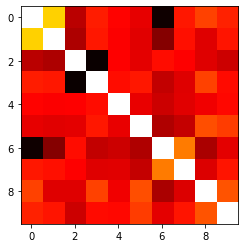

In [114]:
# plotar um heatmap a partir das correlações
plt.imshow(cor, cmap='hot', interpolation='nearest')
plt.show()

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [135]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    4541
Private room       1669
Shared room          87
Hotel room           69
Name: room_type, dtype: int64

In [136]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.713321
Private room       0.262174
Shared room        0.013666
Hotel room         0.010839
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



# Loop com uma média de $331,39
**Detalhes disponibilizados na seção seguinte**

In [329]:
# pega a quantidade de anuncios, ordena pelo índice e coloca no dataframe
table = df.neighbourhood.value_counts()
dfA = pd.DataFrame(data=table)
dfA.sort_index(inplace=True)

# pega a média de preços por região e coloca no dataframe
regioes = df.groupby('neighbourhood').price.mean()
dfB = pd.DataFrame(data=regioes)

# junta os dataframes, renomeia as colunas e ordena pela quantidade de anúncios
dfC = dfA.join(dfB)
dfC.columns = ['qtde_anuncios', 'preco_medio']

# Bairros ordenados por quantidade de anúncios

In [331]:
dfC.sort_values('qtde_anuncios', ascending=False, inplace=True)
dfC

,qtde_anuncios,preco_medio
Near North Side,722,249.343490
West Town,679,210.416789
Lake View,574,244.590592
Logan Square,393,167.605598
Near West Side,372,184.865591
...,...,...
West Elsdon,1,105.000000
Burnside,1,200.000000
Gage Park,1,99.000000
Avalon Park,1,65.000000


# Bairros ordenados por preço médio de anúncio

In [333]:
dfC.sort_values('preco_medio', ascending=False)
dfC

,qtde_anuncios,preco_medio
Loop,342,331.394737
West Englewood,7,268.571429
West Lawn,9,264.111111
Near North Side,722,249.343490
Lake View,574,244.590592
...,...,...
Norwood Park,30,63.966667
Chicago Lawn,4,59.250000
Calumet Heights,26,55.961538
Mount Greenwood,4,47.250000


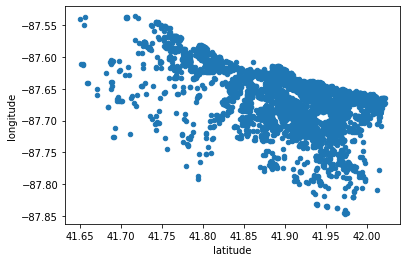

In [336]:
# plotar os imóveis pela latitude-longitude
df.plot.scatter('latitude','longitude')

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [105]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

9.036443606660383

## Conclusões

Os datasets do AirBnb são extremamente intuitivos e ideais para elaborações de análises experimentais e obtenções de insights.
